# Analysis of Sobol' sequence

## Setting up data frame for scrambled and normal Sobol' sequence

In [1]:
from scipy.stats import qmc
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

df1 = pd.DataFrame()
df2 = pd.DataFrame()

In [4]:
sampler1 = qmc.Sobol(d=3, scramble = False)
sample1 = sampler1.random_base2(10)

x1 = [x[0] for x in sample1]
y1 = [x[1] for x in sample1]
z1 = [x[2] for x in sample1]

sample1

array([[0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.5       ],
       [0.75      , 0.25      , 0.25      ],
       ...,
       [0.75097656, 0.50292969, 0.86230469],
       [0.50097656, 0.25292969, 0.11230469],
       [0.00097656, 0.75292969, 0.61230469]])

In [5]:
len(sample1)

1024

In [7]:
sampler2 = qmc.Sobol(d=3, scramble = True, seed = 11)
sample2 = sampler2.random_base2(10)

x2 = [x[0] for x in sample2]
y2 = [x[1] for x in sample2]
z2 = [x[2] for x in sample2]

sample2

array([[0.35347568, 0.49155043, 0.56391544],
       [0.8850557 , 0.66422056, 0.35459046],
       [0.50091068, 0.08820359, 0.7892389 ],
       ...,
       [0.50129315, 0.66664222, 0.10718668],
       [0.8866589 , 0.08678872, 0.54585896],
       [0.35184387, 0.7575024 , 0.25451436]])

In [ ]:
len(sample2)

In [9]:
# Setting table for unscramble data frame, DataFrame1 
df1['x1'] = x1 
df1['y1'] = y1 
df1['z1'] = z1 

# Setting table for scramble data frame, DataFrame2 
df2['x2'] = x2 
df2['y2'] = y2
df2['z2'] = z2 

print(df1.head(5))
print(df2.head(5))

      x1     y1     z1
0  0.000  0.000  0.000
1  0.500  0.500  0.500
2  0.750  0.250  0.250
3  0.250  0.750  0.750
4  0.375  0.375  0.625
         x2        y2        z2
0  0.353476  0.491550  0.563915
1  0.885056  0.664221  0.354590
2  0.500911  0.088204  0.789239
3  0.222012  0.755019  0.002216
4  0.112736  0.215531  0.375768


## A plot of the first 1024 points of the normal and scrambled Sobol' sequence

<IPython.core.display.Javascript object>


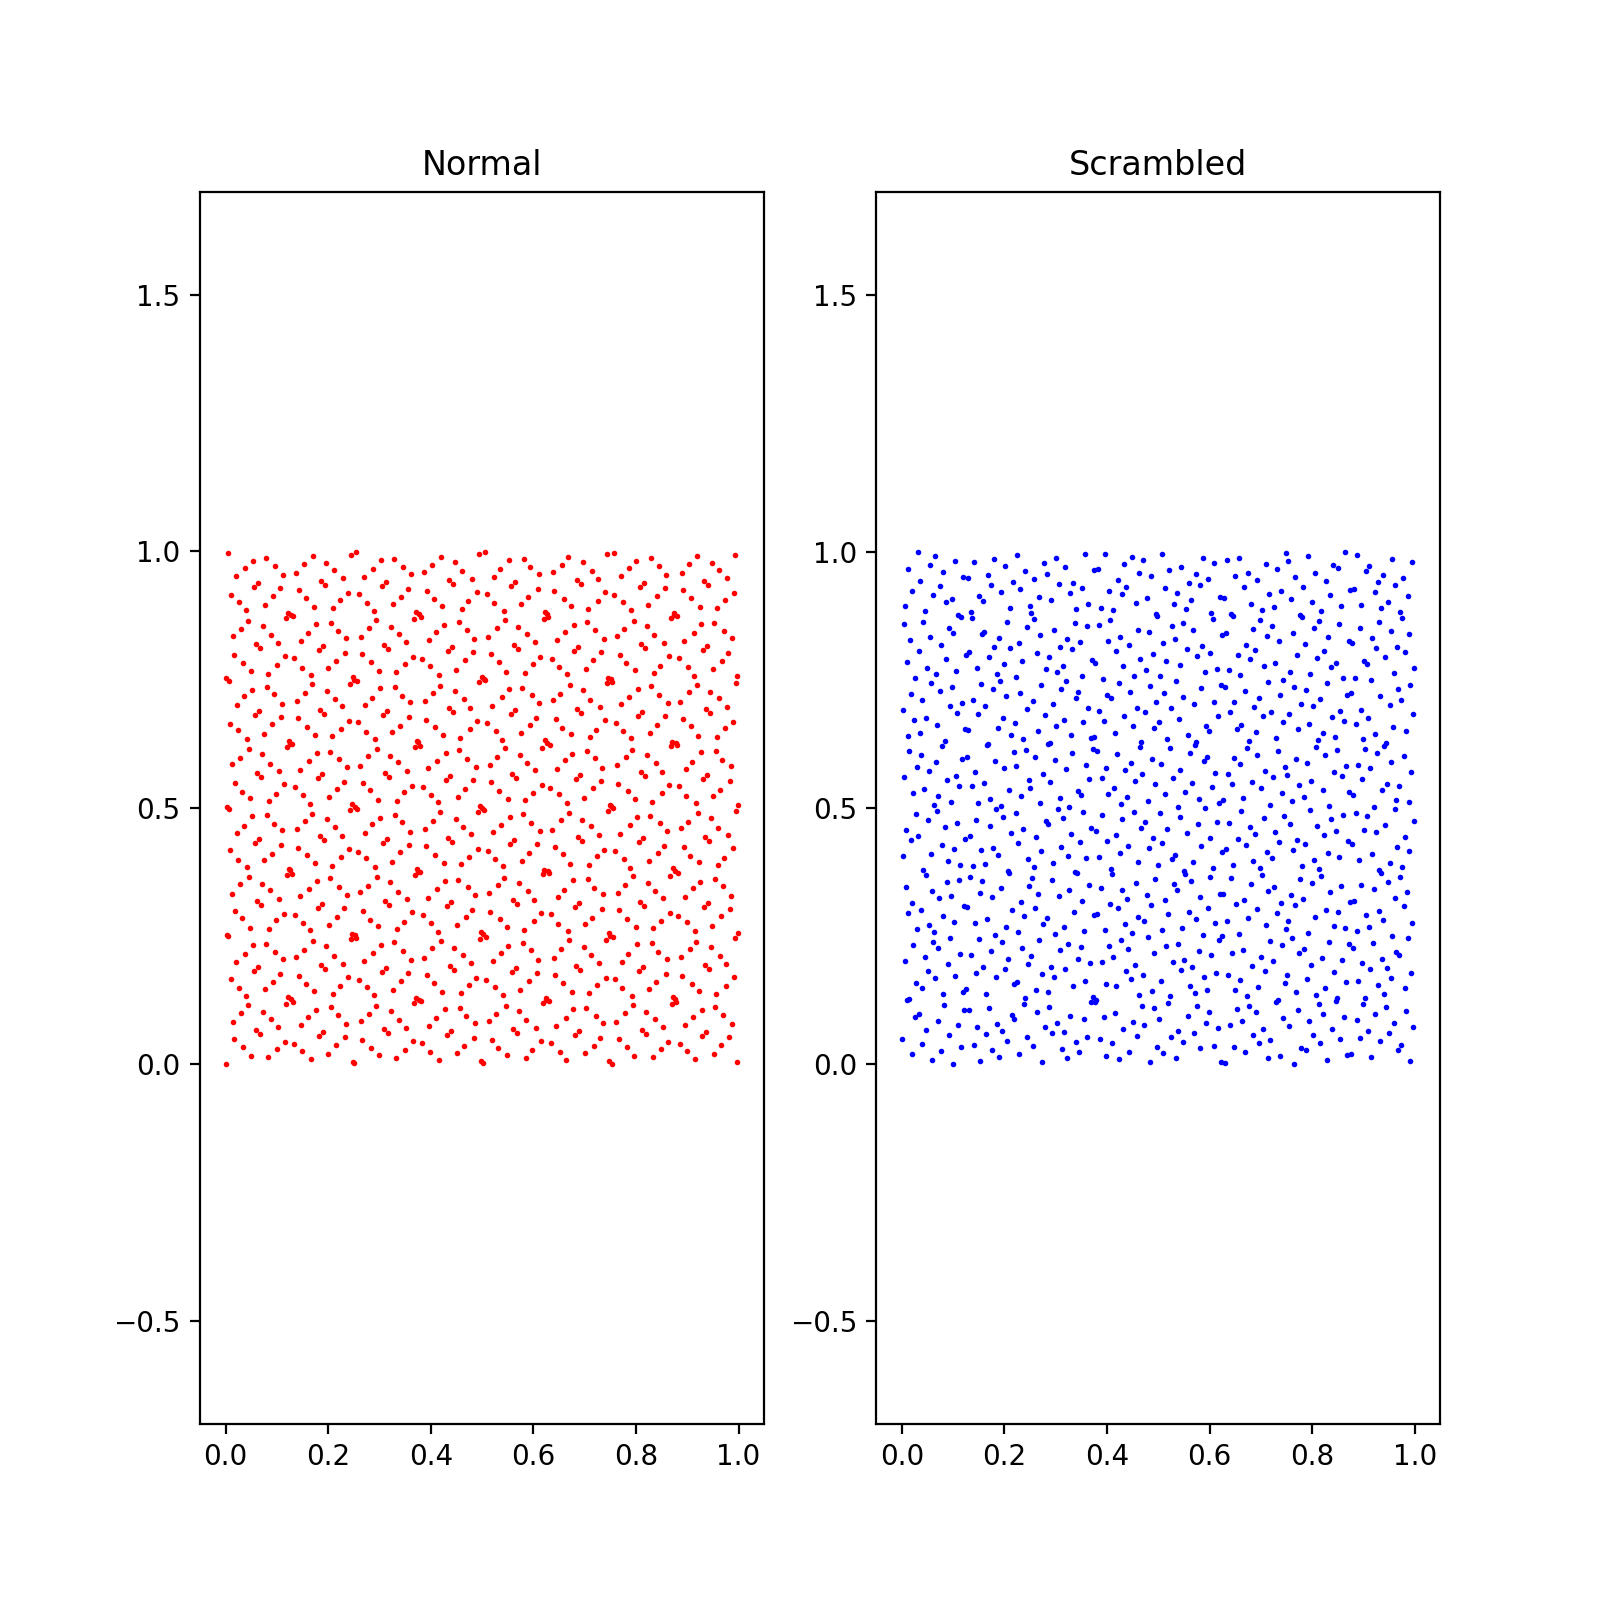

In [48]:
# Visualising the Sobol' sequence points 
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,8)) #1 row 2 columns plot
ax1.axis('equal')
ax2.axis('equal') 
ax1.plot(df1['x1'], df1['y1'], 'o', color = 'red', ms = 1)
ax2.plot(df2['x2'], df2['y2'], 'o', color = 'blue', ms = 1)
ax1.title.set_text("Normal")
ax2.title.set_text("Scrambled")

##    Approximating $ \int\limits_{[0,1]^3}^{} f(\boldsymbol{x}) d \boldsymbol{x}  $ where $ f(x, y, z) = x^{2y } - e^{2y + z} $ and $ (\boldsymbol{x}_n)_{n \in \mathbb{N}_0 } $ is the Sobol' sequence with error analysis.

In [20]:
# setting up function to approximate 
f = lambda x, y, z: x ** (2*y) - np.exp(2*y +z)
    
# value calculated by hand 
intg = (np.log(3) - (np.exp(1) - 1) * (np.exp(2) -1)) * 0.5

# setting up table df1 and df2 with function evaluation and approximation 
df1['f(x1,y1,z1)'] = f(df1['x1'], df1['y1'], df1['z1']) 
df2['f(x2,y2,z2)'] = f(df2['x2'], df2['y2'], df2['z2']) 

df1['Cumulative'] = df1['f(x1,y1,z1)'].cumsum()
df1['approx'] = df1['Cumulative'].divide(df1.index.values + 1, axis = 0)
df2['Cumulative'] = df2['f(x2,y2,z2)'].cumsum()
df2['approx'] = df2['Cumulative'].divide(df2.index.values + 1, axis = 0)

print(df1.tail(5))
print(df2.tail(5))

            x1       y1        z1  f(x1,y1,z1)   Cumulative    approx
1019  0.375977  0.62793  0.237305    -4.158431 -5034.453879 -4.935739
1020  0.250977  0.00293  0.362305    -0.453146 -5034.907025 -4.931349
1021  0.750977  0.50293  0.862305    -5.726678 -5040.633703 -4.932127
1022  0.500977  0.25293  0.112305    -1.150582 -5041.784285 -4.928430
1023  0.000977  0.75293  0.612305    -8.315827 -5050.100112 -4.931738
            x2        y2        z2  f(x2,y2,z2)   Cumulative    approx
1019  0.112111  0.543222  0.692525    -5.830961 -5042.073192 -4.943209
1020  0.221601  0.490073  0.819979    -5.822079 -5047.895271 -4.944070
1021  0.501293  0.666642  0.107187    -3.824452 -5051.719723 -4.942974
1022  0.886659  0.086789  0.545859    -1.073940 -5052.793662 -4.939192
1023  0.351844  0.757502  0.254514    -5.662575 -5058.456238 -4.939899


In [24]:
# Computing the errors
df1['error'] = [np.abs(intg - x) for x in df1['approx']]
df2['error'] = [np.abs(intg - x) for x in df2['approx']]

print(df1.tail(5))
print(df2.tail(5))


            x1       y1        z1  f(x1,y1,z1)   Cumulative    approx  \
1019  0.375977  0.62793  0.237305    -4.158431 -5034.453879 -4.935739   
1020  0.250977  0.00293  0.362305    -0.453146 -5034.907025 -4.931349   
1021  0.750977  0.50293  0.862305    -5.726678 -5040.633703 -4.932127   
1022  0.500977  0.25293  0.112305    -1.150582 -5041.784285 -4.928430   
1023  0.000977  0.75293  0.612305    -8.315827 -5050.100112 -4.931738   

         error  
1019  0.004054  
1020  0.008445  
1021  0.007666  
1022  0.011363  
1023  0.008055  
            x2        y2        z2  f(x2,y2,z2)   Cumulative    approx  \
1019  0.112111  0.543222  0.692525    -5.830961 -5042.073192 -4.943209   
1020  0.221601  0.490073  0.819979    -5.822079 -5047.895271 -4.944070   
1021  0.501293  0.666642  0.107187    -3.824452 -5051.719723 -4.942974   
1022  0.886659  0.086789  0.545859    -1.073940 -5052.793662 -4.939192   
1023  0.351844  0.757502  0.254514    -5.662575 -5058.456238 -4.939899   

         error

<IPython.core.display.Javascript object>


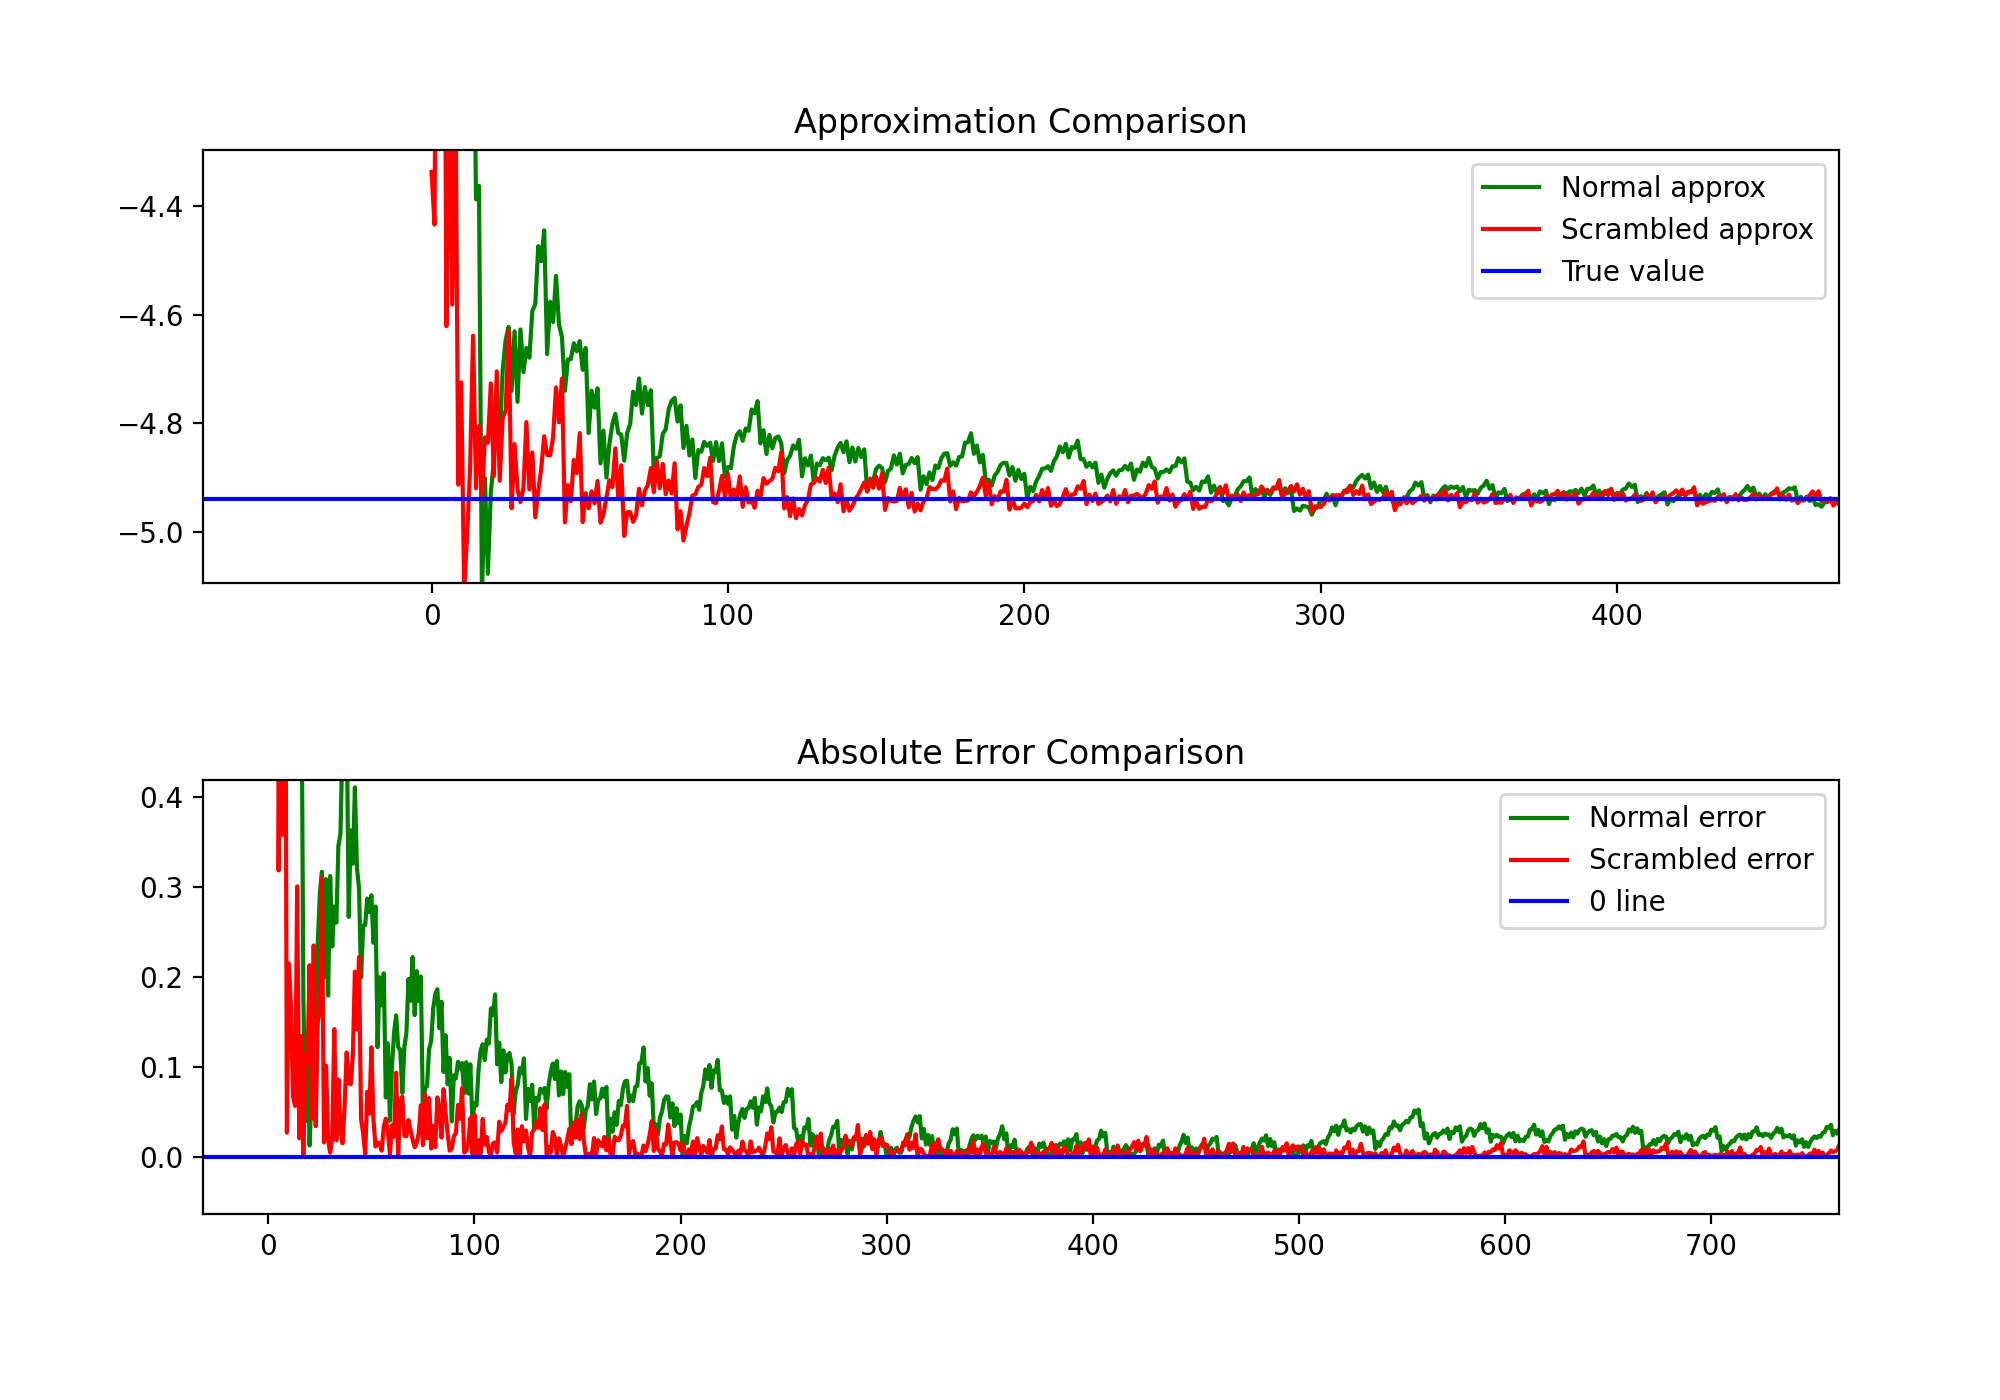

In [49]:
%matplotlib notebook
fig, axes = plt.subplots(2, 1, figsize = (10, 7))

# adding padding between subplots
fig.tight_layout(pad=5.0)

df1['approx'].plot(ax = axes[0], kind = 'line', c = 'g', label = 'Normal approx')
df2['approx'].plot(ax = axes[0], kind = 'line', c = 'r', label = 'Scrambled approx')
axes[0].axhline(y=intg, color='b', linestyle='-', label = 'True value')
axes[0].legend(loc='upper right')
axes[0].title.set_text('Approximation Comparison')


df1['error'].plot(ax = axes[1], kind = 'line', c = 'g', label = 'Normal error')
df2['error'].plot(ax = axes[1], kind = 'line', c = 'r', label = 'Scrambled error')
axes[1].axhline(y=0, color='b', linestyle='-', label = '0 line')
axes[1].legend(loc='upper right')
axes[1].title.set_text('Absolute Error Comparison')
